In [7]:
import numpy as np
import jax.numpy as jnp
import jax
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import rho_plus as rp

is_dark = True
theme, cs = rp.mpl_setup(is_dark)
rp.plotly_setup(is_dark)

In [8]:
%cd ~/programs/avid

/home/nicholas/programs/avid


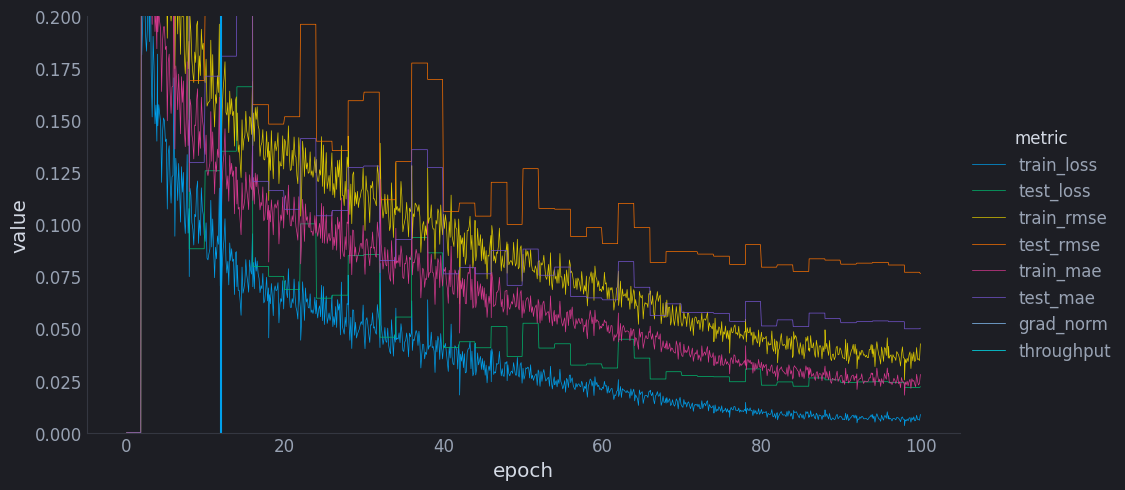

In [9]:
df = pd.read_feather('logs/e_form_equivariant_patch_235/metrics.feather')
mdf = df.melt(id_vars=['step', 'epoch'], var_name='metric')
separate_vars = ['lr', 'rel_mins']
sns.relplot(mdf[~mdf['metric'].isin(separate_vars)], hue='metric', x='epoch', y='value',
            kind='line', aspect=2, lw=0.5)
plt.ylim(0, 0.2)
plt.axvline(12)

/home/nicholas/anaconda3/envs/avid/lib/python3.12/site-packages/rho_plus/smoothing.py:33: RuntimeWarning: divide by zero encountered in divide
  overlap_pct = (overlap_areas / areas).clip(0, 1)


(0.0, 0.3)

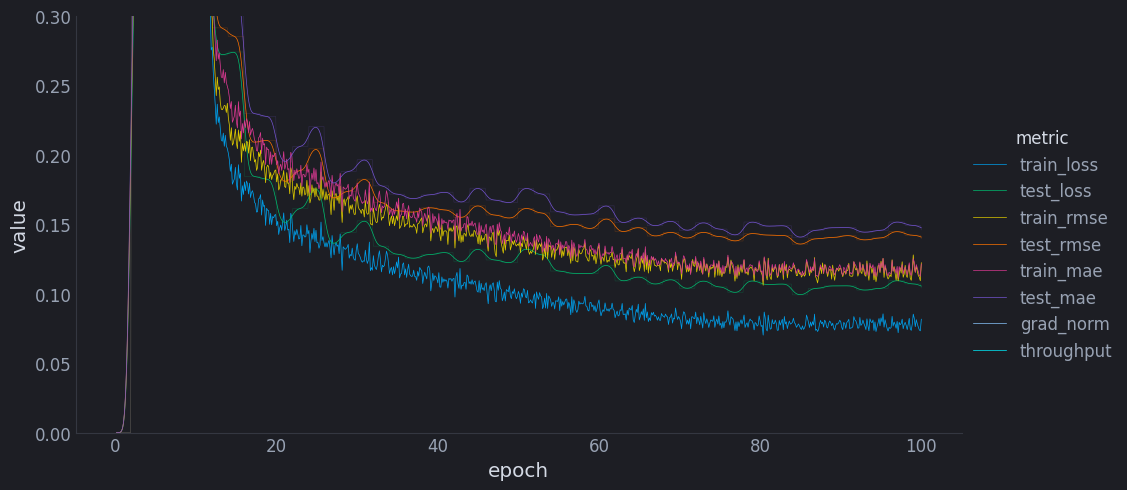

In [10]:
df = pd.read_feather('logs/e_form_no_downsample_564/metrics.feather')
test_cols = [col for col in df.columns if col.startswith('test_')]
df[test_cols] = np.where(df[test_cols] == 1, np.nan, df[test_cols])
mdf = df.melt(id_vars=['step', 'epoch'], var_name='metric')
separate_vars = ['lr', 'rel_mins']
sns.relplot(mdf[~mdf['metric'].isin(separate_vars)], hue='metric', x='epoch', y='value',
            kind='line', aspect=2, lw=0.5)

rp.smooth_noisy_lines()
plt.ylim(0.0, 0.3)

/home/nicholas/anaconda3/envs/avid/lib/python3.12/site-packages/rho_plus/smoothing.py:33: RuntimeWarning: divide by zero encountered in divide
  overlap_pct = (overlap_areas / areas).clip(0, 1)


(0.0, 0.3)

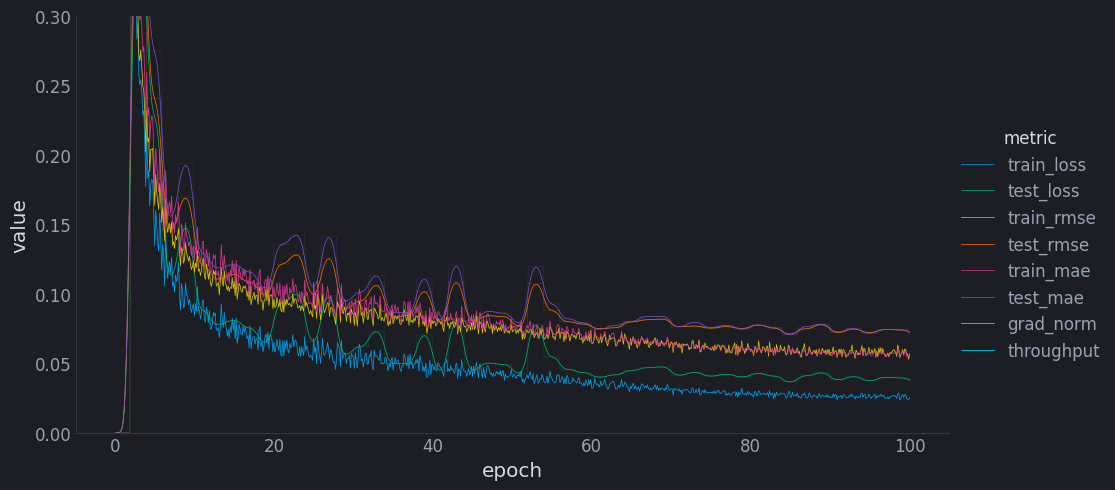

In [11]:
df = pd.read_feather('logs/e_form_no_downsample_253/metrics.feather')
test_cols = [col for col in df.columns if col.startswith('test_')]
df[test_cols] = np.where(df[test_cols] == 1, np.nan, df[test_cols])
mdf = df.melt(id_vars=['step', 'epoch'], var_name='metric')
separate_vars = ['lr', 'rel_mins']
sns.relplot(mdf[~mdf['metric'].isin(separate_vars)], hue='metric', x='epoch', y='value',
            kind='line', aspect=2, lw=0.5)

rp.smooth_noisy_lines()
plt.ylim(0, 0.3)